In [49]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
#Function that 
def imshow(img):
    h, w = np.shape(img)
    np_rgb = np.zeros((h, w, 3))
    np_rgb[:,:,0] = img[:,:]
    np_rgb[:,:,1] = img[:,:]
    np_rgb[:,:,2] = img[:,:]
    plt.imshow(np_rgb)
    plt.show()

In [67]:
def draw_line(img, p1, p2):
    imgCols, imgRows = np.shape(img)
    x1 = p1[0]
    y1 = p1[1]
    
    x2 = p2[0]
    y2 = p2[1]
    
    Dy = (y2 - y1)
    try:
        Dx = (x2 - x1)
        m = Dy / Dx
        for x in range(x1, x2):
            y = round(m*x + y1)
            img[y, x] = 0
    except(ZeroDivisionError):
        Dx = 0
        img[y1:y2, x1] = 0 
    r = math.sqrt(math.pow(Dx, 2) + math.pow(Dy, 2))
    return img, Dx, Dy, r

In [76]:
def refract_line(img, in_line_p1, in_line_p2, n1, n2):
    image, Dx, Dy, r = draw_line(img, in_line_p1, in_line_p2)
    theta = math.asin((n1*Dy)/(n2*r))
    r2 = 20
    
    Dx2 = r2*math.cos(theta)
    Dy2 = r2*math.sin(theta)
    
    px = in_line_p2[0] + round(Dx2)
    py = in_line_p2[1] + round(Dy2)
    return draw_line(image, in_line_p2, [px, py])

In [77]:
def refraction(incident_lines):
    image = np.ones((200, 300)) 
    line_p1 = [130, 10]
    line_p2 = [130, 190]
    start_point = [0, 125]
    lim1 = 25
    lim2 = 150
    image, Dx, Dy, r = draw_line(image, line_p1, line_p2)
    
    points = [lim1]
    for i in range(2, incident_lines):
        p = round(lim1 + ((lim2 - lim1) / incident_lines) *(i-1))
        points.append(p)
    points.append(lim2)
    for point in points:
        image, Dx, Dy, r = refract_line(image, start_point, [line_p1[0], point], 1, 0.75)
        
    print('Points: {}'.format(points))
    imshow(image)

Points: [25, 67, 150]


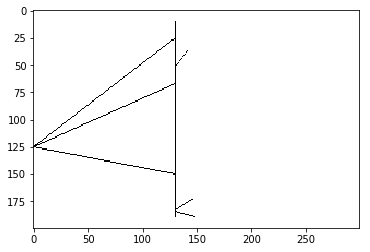

In [78]:
refraction(3)

Points: [25, 50, 75, 100, 150]


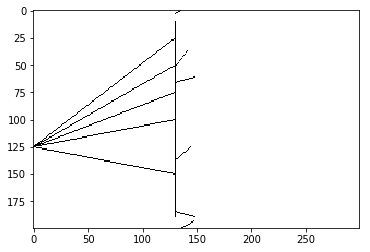

In [79]:
refraction(5)